### ARIMA Example

In [1]:
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot as plt

In [30]:
def parser(x):
    return '190' + x

In [31]:
series = read_csv('Data/ARIMA/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series.index = series.index.to_period('M')
print(series.head())

         Sales
Month         
1901-01  266.0
1901-02  145.9
1901-03  183.1
1901-04  119.3
1901-05  180.3


<Axes: xlabel='Month'>

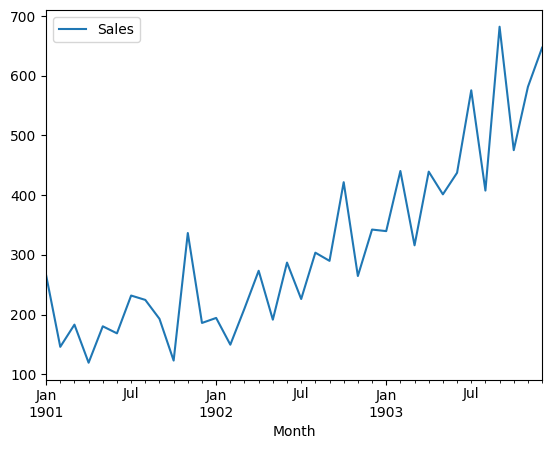

In [32]:
series.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

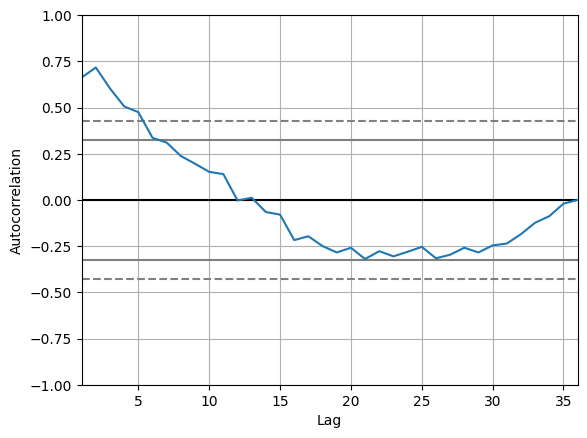

In [33]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

In [34]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [35]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [36]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
 dataset = dataset.astype('float32')
 best_score, best_cfg = float("inf"), None
 for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            print(f'order = {order}')
            mse = evaluate_arima_model(dataset, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order,mse))
 
 print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
p_val = [1, 2, 4, 6, 8, 10]
d_val = range(0, 3)
q_val = range(0, 3)

evaluate_models(series.values, p_val, d_val, q_val)

order = (1, 0, 0)
ARIMA(1, 0, 0) MSE=23112.493
order = (1, 0, 1)
ARIMA(1, 0, 1) MSE=12496.346
order = (1, 0, 2)
ARIMA(1, 0, 2) MSE=5943.170
order = (1, 1, 0)
order = (1, 1, 1)
order = (1, 1, 2)
order = (1, 2, 0)
order = (1, 2, 1)
order = (1, 2, 2)
ARIMA(1, 2, 2) MSE=4291.639
order = (2, 0, 0)
order = (2, 0, 1)
order = (2, 0, 2)
order = (2, 1, 0)
order = (2, 1, 1)
order = (2, 1, 2)
order = (2, 2, 0)
order = (2, 2, 1)
order = (2, 2, 2)
order = (4, 0, 0)
order = (4, 0, 1)
order = (4, 0, 2)
order = (4, 1, 0)
order = (4, 1, 1)
order = (4, 1, 2)
order = (4, 2, 0)
order = (4, 2, 1)
order = (4, 2, 2)
order = (6, 0, 0)
order = (6, 0, 1)
order = (6, 0, 2)
order = (6, 1, 0)
order = (6, 1, 1)
order = (6, 1, 2)
order = (6, 2, 0)
order = (6, 2, 1)
order = (6, 2, 2)
order = (8, 0, 0)
order = (8, 0, 1)
order = (8, 0, 2)
order = (8, 1, 0)
order = (8, 1, 1)
order = (8, 1, 2)
order = (8, 2, 0)
order = (8, 2, 1)
order = (8, 2, 2)
order = (10, 0, 0)
order = (10, 0, 1)
order = (10, 0, 2)
order = (10, 1, 0)


In [21]:
model = ARIMA(series, order=(3,2,3))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -190.594
Date:                Wed, 22 May 2024   AIC                            395.188
Time:                        19:16:02   BIC                            405.873
Sample:                    01-31-1901   HQIC                           398.832
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2450      0.291     -4.280      0.000      -1.815      -0.675
ar.L2         -0.1161      0.410     -0.283      0.777      -0.919       0.687
ar.L3          0.2332      0.219      1.063      0.2

<Axes: xlabel='Month'>

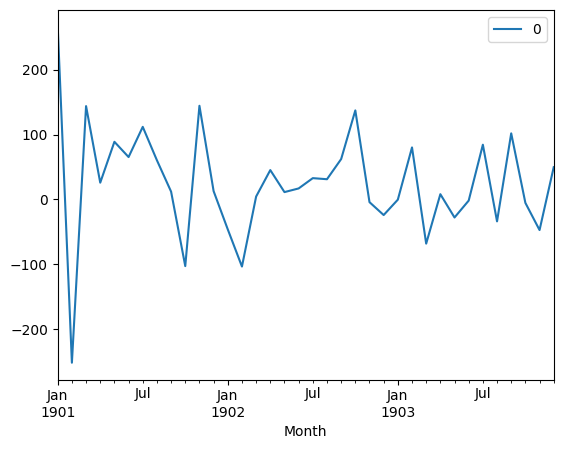

In [22]:
residuals = DataFrame(model_fit.resid)
residuals.plot()

<Axes: ylabel='Density'>

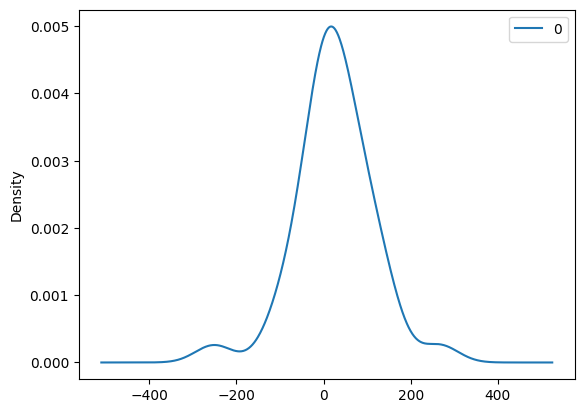

In [23]:
residuals.plot(kind='kde')

In [24]:
print(residuals.describe())

                0
count   36.000000
mean    24.446589
std     87.760008
min   -251.460899
25%     -9.978896
50%     14.884318
75%     68.999001
max    266.000000


In [25]:
X = series.values
size = int(len(X)*0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()

In [26]:
for t in range(len(test)):
    model = ARIMA(history, order=(3,2,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted = {yhat}, expected = {obs}')

predicted = 374.6865708971321, expected = [342.3]
predicted = 331.03444108382115, expected = [339.7]
predicted = 413.1612963450999, expected = [440.4]
predicted = 369.8253317971094, expected = [315.9]
predicted = 382.9074621896415, expected = [439.3]
predicted = 325.1788163671773, expected = [401.3]
predicted = 450.2068285374703, expected = [437.4]
predicted = 459.12402690624066, expected = [575.5]
predicted = 491.19610999584063, expected = [407.6]
predicted = 561.6221170195747, expected = [682.]
predicted = 474.1035931225883, expected = [475.3]
predicted = 644.1716303228422, expected = [581.3]
predicted = 594.006532547098, expected = [646.9]


In [27]:
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'test RMSE = {rmse:.3f}')

test RMSE = 65.449


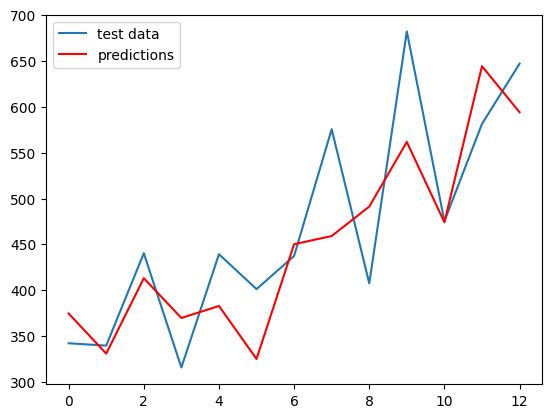

In [28]:
plt.plot(test, label='test data')
plt.plot(predictions, color='r', label='predictions')
plt.legend()

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


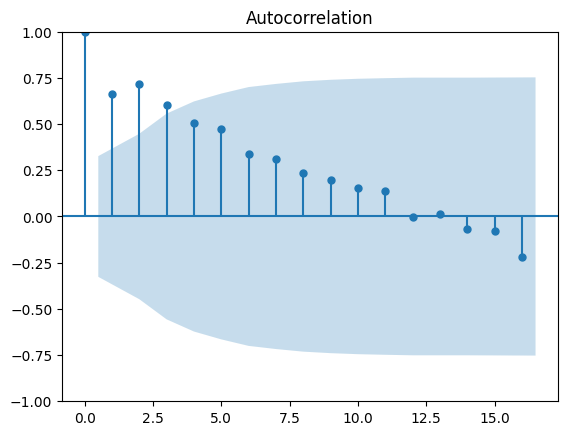

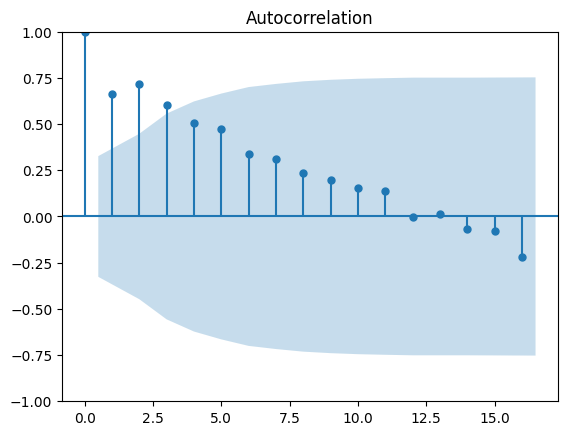

In [23]:
plot_acf(X)

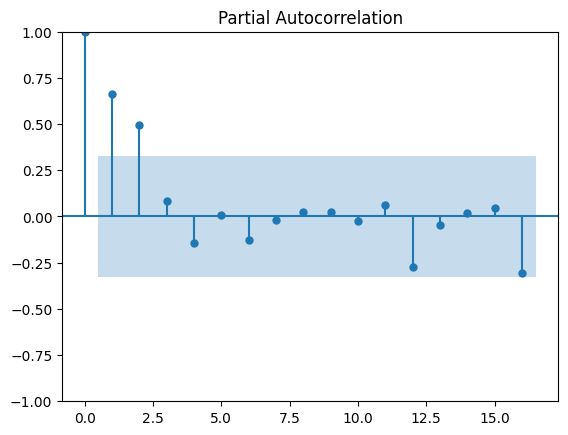

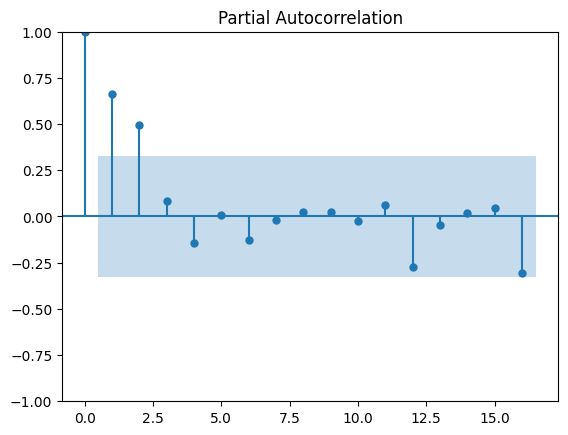

In [45]:
plot_pacf(X)

In [16]:
xd = np.empty((len(X)-1, 1))
for i in range(len(xd)):
    xd[i] = X[i+1]-X[i]

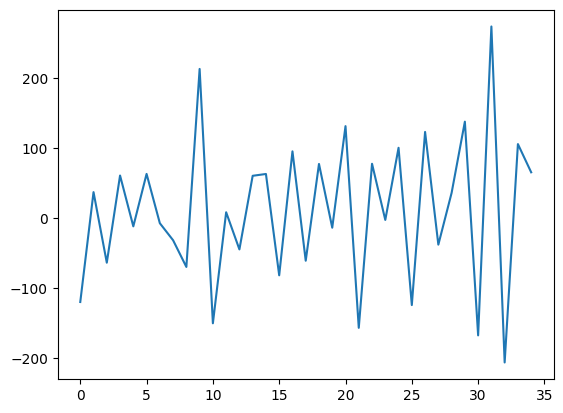

In [17]:
plt.plot(xd)

In [18]:
adfuller(xd)[1]

1.7998574141687034e-10

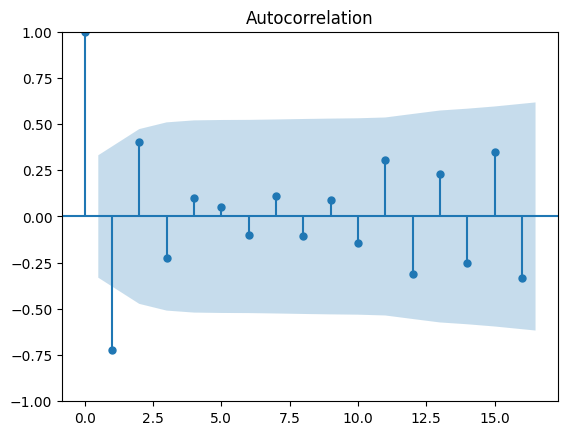

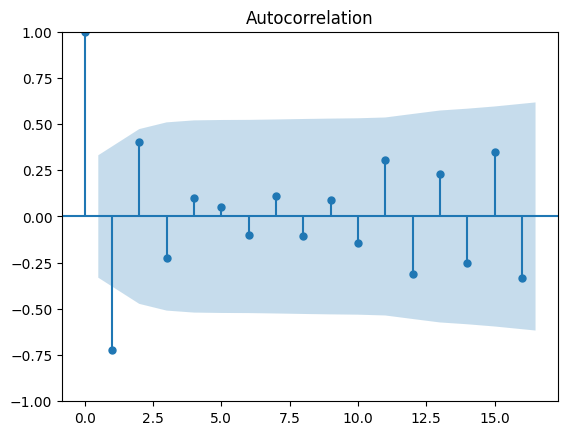

In [24]:
plot_acf(xd)

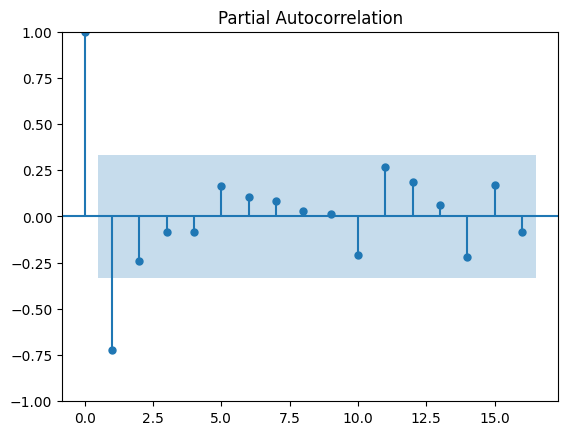

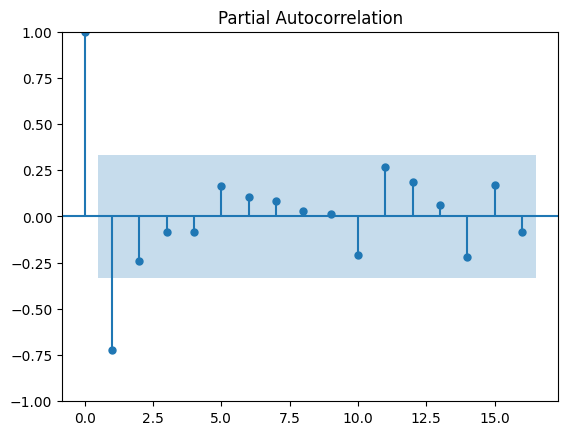

In [25]:
plot_pacf(xd)

In [46]:
X = series.values
size = int(len(X)*0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()

In [47]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted = {yhat}, expected = {obs}')

/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 352.68463967741644, expected = [342.3]
predicted = 313.2833844456678, expected = [339.7]
predicted = 398.26378630105523, expected = [440.4]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 344.1011457551357, expected = [315.9]
predicted = 358.1196913510849, expected = [439.3]
predicted = 315.73614848980094, expected = [401.3]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 442.2252299264063, expected = [437.4]
predicted = 422.2778911981666, expected = [575.5]
predicted = 456.6560365065784, expected = [407.6]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 557.7893439864877, expected = [682.]
predicted = 471.0929996207957, expected = [475.3]
predicted = 667.7511748123909, expected = [581.3]
predicted = 636.8617338698773, expected = [646.9]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'test RMSE = {rmse:.3f}')

test RMSE = 71.369


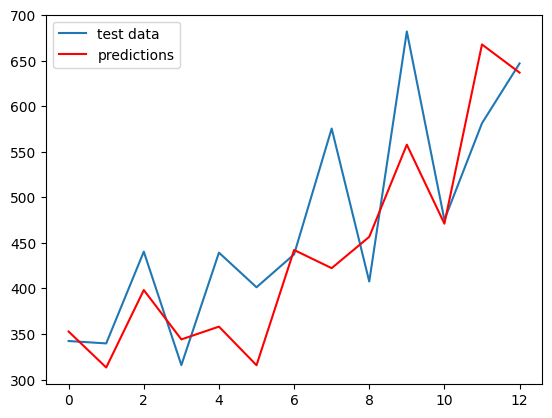

In [49]:
plt.plot(test, label='test data')
plt.plot(predictions, color='r', label='predictions')
plt.legend()

In [56]:
size = int(len(xd)*0.66)
train, test = xd[:size], xd[size:]
history = [x for x in train]
predictions = list()

In [57]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted = {yhat}, expected = {obs}')

/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = -21.501551594379077, expected = [-2.6]
predicted = 71.22363524909679, expected = [100.7]
predicted = -79.24458846388164, expected = [-124.5]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 78.82111517923441, expected = [123.4]
predicted = -123.49372629885738, expected = [-38.]
predicted = 15.30291236306518, expected = [36.1]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = -19.916186845895936, expected = [138.1]
predicted = -116.25957987091473, expected = [-167.9]
predicted = 154.6587168890946, expected = [274.4]
predicted = -254.91511501633445, expected = [-206.7]
predicted = 198.19028179076165, expected = [106.]
predicted = 11.851155743309107, expected = [65.6]


/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/guilherme/venvs/PyTorch/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'test RMSE = {rmse:.3f}')

test RMSE = 75.658


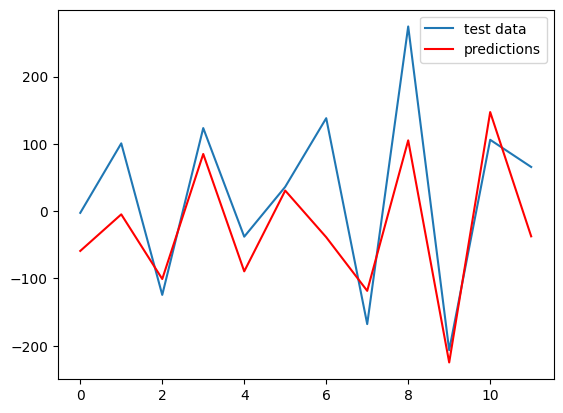

In [139]:
plt.plot(test, label='test data')
plt.plot(predictions, color='r', label='predictions')
plt.legend()